In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.externals import joblib

C:\Users\Utilizador\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


# Subjects data preparation

In [2]:
df1 = pd.read_csv(r'C:\Users\Utilizador\OneDrive\Ambiente de Trabalho\Neurological_Status\01EDA.csv')
df1 = df1.drop(0)
df1 = df1.drop("'ax'", 1)
df1 = df1.drop("'ay'", 1)
df1 = df1.drop("'az'", 1)
df1 = df1.apply(pd.to_numeric)
df1['annotation'] = 0
df1.loc[df1["'sample interval'"] <= 2400, ['annotation']] = '0'
df1.loc[df1["'sample interval'"].loc[2403:5027], ['annotation']] = '1'
df1.loc[df1["'sample interval'"].loc[5028:7428], ['annotation']] = '0'
df1.loc[df1["'sample interval'"].loc[7429:7749], ['annotation']] = '1'
df1.loc[df1["'sample interval'"].loc[7750:10662], ['annotation']] = '1'
df1.loc[df1["'sample interval'"].loc[10663:13063], ['annotation']] = '0'
df1.loc[df1["'sample interval'"].loc[13064:15944], ['annotation']] = '1'
df1.loc[df1["'sample interval'"] >= 15943, ['annotation']] = '0'

df2 = pd.read_csv(r'C:\Users\Utilizador\OneDrive\Ambiente de Trabalho\Neurological_Status\02EDA.csv')
df2 = df2.drop(0)
df2 = df2.drop("'ax'", 1)
df2 = df2.drop("'ay'", 1)
df2 = df2.drop("'az'", 1)
df2 = df2.apply(pd.to_numeric)
df2['annotation'] = 0
df2.loc[df2["'sample interval'"] <= 2400, ['annotation']] = '0'
df2.loc[df2["'sample interval'"].loc[2403:5019], ['annotation']] = '1'
df2.loc[df2["'sample interval'"].loc[5020:7420], ['annotation']] = '0'
df2.loc[df2["'sample interval'"].loc[7421:7741], ['annotation']] = '1'
df2.loc[df2["'sample interval'"].loc[7742:10582], ['annotation']] = '1'
df2.loc[df2["'sample interval'"].loc[10583:12983], ['annotation']] = '0'
df2.loc[df2["'sample interval'"].loc[12984:15928], ['annotation']] = '1'
df2.loc[df2["'sample interval'"] >= 15927, ['annotation']] = '0'

df3 = pd.read_csv(r'C:\Users\Utilizador\OneDrive\Ambiente de Trabalho\Neurological_Status\03EDA.csv')
df3 = df3.drop(0)
df3 = df3.drop("'ax'", 1)
df3 = df3.drop("'ay'", 1)
df3 = df3.drop("'az'", 1)
df3 = df3.apply(pd.to_numeric)
df3['annotation'] = 0
df3.loc[df3["'sample interval'"] <= 2400, ['annotation']] = '0'
df3.loc[df3["'sample interval'"].loc[2403:4995], ['annotation']] = '1'
df3.loc[df3["'sample interval'"].loc[4996:7396], ['annotation']] = '0'
df3.loc[df3["'sample interval'"].loc[7397:7717], ['annotation']] = '1'
df3.loc[df3["'sample interval'"].loc[7718:10550], ['annotation']] = '1'
df3.loc[df3["'sample interval'"].loc[10551:12951], ['annotation']] = '0'
df3.loc[df3["'sample interval'"].loc[12952:15856], ['annotation']] = '1'
df3.loc[df3["'sample interval'"] >= 15855, ['annotation']] = '0'

df4 = pd.read_csv(r'C:\Users\Utilizador\OneDrive\Ambiente de Trabalho\Neurological_Status\04EDA.csv')
df4 = df4.drop(0)
df4 = df4.drop("'ax'", 1)
df4 = df4.drop("'ay'", 1)
df4 = df4.drop("'az'", 1)
df4 = df4.apply(pd.to_numeric)
df4['annotation'] = 0
df4.loc[df4["'sample interval'"] <= 2400, ['annotation']] = '0'
df4.loc[df4["'sample interval'"].loc[2403:5019], ['annotation']] = '1'
df4.loc[df4["'sample interval'"].loc[5020:7420], ['annotation']] = '0'
df4.loc[df4["'sample interval'"].loc[7421:7741], ['annotation']] = '1'
df4.loc[df4["'sample interval'"].loc[7742:10582], ['annotation']] = '1'
df4.loc[df4["'sample interval'"].loc[10583:12975], ['annotation']] = '0'
df4.loc[df4["'sample interval'"].loc[12976:15848], ['annotation']] = '1'
df4.loc[df4["'sample interval'"] >= 15847, ['annotation']] = '0'

df5 = pd.read_csv(r'C:\Users\Utilizador\OneDrive\Ambiente de Trabalho\Neurological_Status\05EDA.csv')
df5 = df5.drop(0)
df5 = df5.drop("'ax'", 1)
df5 = df5.drop("'ay'", 1)
df5 = df5.drop("'az'", 1)
df5 = df5.apply(pd.to_numeric)
df5['annotation'] = 0
df5.loc[df5["'sample interval'"] <= 2400, ['annotation']] = '0'
df5.loc[df5["'sample interval'"].loc[2403:5011], ['annotation']] = '1'
df5.loc[df5["'sample interval'"].loc[5012:7412], ['annotation']] = '0'
df5.loc[df5["'sample interval'"].loc[7413:7733], ['annotation']] = '1'
df5.loc[df5["'sample interval'"].loc[7734:10566], ['annotation']] = '1'
df5.loc[df5["'sample interval'"].loc[10567:12967], ['annotation']] = '0'
df5.loc[df5["'sample interval'"].loc[12968:15848], ['annotation']] = '1'
df5.loc[df5["'sample interval'"] >= 15847, ['annotation']] = '0'

df6 = pd.read_csv(r'C:\Users\Utilizador\OneDrive\Ambiente de Trabalho\Neurological_Status\06EDA.csv')
df6 = df6.drop(0)
df6 = df6.drop("'ax'", 1)
df6 = df6.drop("'ay'", 1)
df6 = df6.drop("'az'", 1)
df6 = df6.apply(pd.to_numeric)
df6['annotation'] = 0
df6.loc[df6["'sample interval'"] <= 2400, ['annotation']] = '0'
df6.loc[df6["'sample interval'"].loc[2403:5011], ['annotation']] = '1'
df6.loc[df6["'sample interval'"].loc[5012:7412], ['annotation']] = '0'
df6.loc[df6["'sample interval'"].loc[7413:7733], ['annotation']] = '1'
df6.loc[df6["'sample interval'"].loc[7734:10582], ['annotation']] = '1'
df6.loc[df6["'sample interval'"].loc[10583:12967], ['annotation']] = '0'
df6.loc[df6["'sample interval'"].loc[12968:15840], ['annotation']] = '1'
df6.loc[df6["'sample interval'"] >= 15839, ['annotation']] = '0'

df7 = pd.read_csv(r'C:\Users\Utilizador\OneDrive\Ambiente de Trabalho\Neurological_Status\07EDA.csv')
df7 = df7.drop(0)
df7 = df7.drop("'ax'", 1)
df7 = df7.drop("'ay'", 1)
df7 = df7.drop("'az'", 1)
df7 = df7.apply(pd.to_numeric)
df7['annotation'] = 0
df7.loc[df7["'sample interval'"] <= 2400, ['annotation']] = '0'
df7.loc[df7["'sample interval'"].loc[2403:5011], ['annotation']] = '1'
df7.loc[df7["'sample interval'"].loc[5012:7412], ['annotation']] = '0'
df7.loc[df7["'sample interval'"].loc[7413:7733], ['annotation']] = '1'
df7.loc[df7["'sample interval'"].loc[7734:10502], ['annotation']] = '1'
df7.loc[df7["'sample interval'"].loc[10503:12903], ['annotation']] = '0'
df7.loc[df7["'sample interval'"].loc[12904:15776], ['annotation']] = '1'
df7.loc[df7["'sample interval'"] >= 15775, ['annotation']] = '0'

df8 = pd.read_csv(r'C:\Users\Utilizador\OneDrive\Ambiente de Trabalho\Neurological_Status\08EDA.csv')
df8 = df8.drop(0)
df8 = df8.drop("'ax'", 1)
df8 = df8.drop("'ay'", 1)
df8 = df8.drop("'az'", 1)
df8 = df8.apply(pd.to_numeric)
df8['annotation'] = 0
df8.loc[df8["'sample interval'"] <= 2400, ['annotation']] = '0'
df8.loc[df8["'sample interval'"].loc[2403:5019], ['annotation']] = '1'
df8.loc[df8["'sample interval'"].loc[5020:7420], ['annotation']] = '0'
df8.loc[df8["'sample interval'"].loc[7421:7741], ['annotation']] = '1'
df8.loc[df8["'sample interval'"].loc[7742:10574], ['annotation']] = '1'
df8.loc[df8["'sample interval'"].loc[10575:12975], ['annotation']] = '0'
df8.loc[df8["'sample interval'"].loc[12976:15856], ['annotation']] = '1'
df8.loc[df8["'sample interval'"] >= 15855, ['annotation']] = '0'

df9 = pd.read_csv(r'C:\Users\Utilizador\OneDrive\Ambiente de Trabalho\Neurological_Status\09EDA.csv')
df9 = df9.drop(0)
df9 = df9.drop("'ax'", 1)
df9 = df9.drop("'ay'", 1)
df9 = df9.drop("'az'", 1)
df9 = df9.apply(pd.to_numeric)
df9['annotation'] = 0
df9.loc[df9["'sample interval'"] <= 2400, ['annotation']] = '0'
df9.loc[df9["'sample interval'"].loc[2403:5019], ['annotation']] = '1'
df9.loc[df9["'sample interval'"].loc[5020:7420], ['annotation']] = '0'
df9.loc[df9["'sample interval'"].loc[7421:7741], ['annotation']] = '1'
df9.loc[df9["'sample interval'"].loc[7742:10574], ['annotation']] = '1'
df9.loc[df9["'sample interval'"].loc[10575:12975], ['annotation']] = '0'
df9.loc[df9["'sample interval'"].loc[12976:15848], ['annotation']] = '1'
df9.loc[df9["'sample interval'"] >= 15847, ['annotation']] = '0'

df10 = pd.read_csv(r'C:\Users\Utilizador\OneDrive\Ambiente de Trabalho\Neurological_Status\10EDA.csv')
df10 = df10.drop(0)
df10 = df10.drop("'ax'", 1)
df10 = df10.drop("'ay'", 1)
df10 = df10.drop("'az'", 1)
df10 = df10.apply(pd.to_numeric)
df10['annotation'] = 0
df10.loc[df10["'sample interval'"] <= 2400, ['annotation']] = '0'
df10.loc[df10["'sample interval'"].loc[2403:5011], ['annotation']] = '1'
df10.loc[df10["'sample interval'"].loc[5012:7412], ['annotation']] = '0'
df10.loc[df10["'sample interval'"].loc[7413:7733], ['annotation']] = '1'
df10.loc[df10["'sample interval'"].loc[7734:10574], ['annotation']] = '1'
df10.loc[df10["'sample interval'"].loc[10575:12975], ['annotation']] = '0'
df10.loc[df10["'sample interval'"].loc[12976:15840], ['annotation']] = '1'
df10.loc[df10["'sample interval'"] >= 15839, ['annotation']] = '0'

df11 = pd.read_csv(r'C:\Users\Utilizador\OneDrive\Ambiente de Trabalho\Neurological_Status\11EDA.csv')
df11 = df11.drop(0)
df11 = df11.drop("'ax'", 1)
df11 = df11.drop("'ay'", 1)
df11 = df11.drop("'az'", 1)
df11 = df11.apply(pd.to_numeric)
df11['annotation'] = 0
df11.loc[df11["'sample interval'"] <= 2400, ['annotation']] = '0'
df11.loc[df11["'sample interval'"].loc[2403:5019], ['annotation']] = '1'
df11.loc[df11["'sample interval'"].loc[5020:7420], ['annotation']] = '0'
df11.loc[df11["'sample interval'"].loc[7421:7741], ['annotation']] = '1'
df11.loc[df11["'sample interval'"].loc[7742:10582], ['annotation']] = '1'
df11.loc[df11["'sample interval'"].loc[10583:12983], ['annotation']] = '0'
df11.loc[df11["'sample interval'"].loc[12984:17864], ['annotation']] = '1'
df11.loc[df11["'sample interval'"] >= 17863, ['annotation']] = '0'

df12 = pd.read_csv(r'C:\Users\Utilizador\OneDrive\Ambiente de Trabalho\Neurological_Status\12EDA.csv')
df12 = df12.drop(0)
df12 = df12.drop("'ax'", 1)
df12 = df12.drop("'ay'", 1)
df12 = df12.drop("'az'", 1)
df12 = df12.apply(pd.to_numeric)
df12['annotation'] = 0
df12.loc[df12["'sample interval'"] <= 2384, ['annotation']] = '0'
df12.loc[df12["'sample interval'"].loc[2387:4995], ['annotation']] = '1'
df12.loc[df12["'sample interval'"].loc[4996:7404], ['annotation']] = '0'
df12.loc[df12["'sample interval'"].loc[7405:7725], ['annotation']] = '1'
df12.loc[df12["'sample interval'"].loc[7726:10558], ['annotation']] = '1'
df12.loc[df12["'sample interval'"].loc[10559:12959], ['annotation']] = '0'
df12.loc[df12["'sample interval'"].loc[12960:15832], ['annotation']] = '1'
df12.loc[df12["'sample interval'"] >= 15831, ['annotation']] = '0'

df13 = pd.read_csv(r'C:\Users\Utilizador\OneDrive\Ambiente de Trabalho\Neurological_Status\13EDA.csv')
df13 = df13.drop(0)
df13 = df13.drop("'ax'", 1)
df13 = df13.drop("'ay'", 1)
df13 = df13.drop("'az'", 1)
df13 = df13.apply(pd.to_numeric)
df13['annotation'] = 0
df13.loc[df13["'sample interval'"] <= 2400, ['annotation']] = '0'
df13.loc[df13["'sample interval'"].loc[2403:5019], ['annotation']] = '1'
df13.loc[df13["'sample interval'"].loc[5020:7420], ['annotation']] = '0'
df13.loc[df13["'sample interval'"].loc[7421:7741], ['annotation']] = '1'
df13.loc[df13["'sample interval'"].loc[7742:10574], ['annotation']] = '1'
df13.loc[df13["'sample interval'"].loc[10575:12975], ['annotation']] = '0'
df13.loc[df13["'sample interval'"].loc[12976:15848], ['annotation']] = '1'
df13.loc[df13["'sample interval'"] >= 15847, ['annotation']] = '0'

df14 = pd.read_csv(r'C:\Users\Utilizador\OneDrive\Ambiente de Trabalho\Neurological_Status\14EDA.csv')
df14 = df14.drop(0)
df14 = df14.drop("'ax'", 1)
df14 = df14.drop("'ay'", 1)
df14 = df14.drop("'az'", 1)
df14 = df14.apply(pd.to_numeric)
df14['annotation'] = 0
df14.loc[df14["'sample interval'"] <= 2400, ['annotation']] = '0'
df14.loc[df14["'sample interval'"].loc[2403:5011], ['annotation']] = '1'
df14.loc[df14["'sample interval'"].loc[5012:7412], ['annotation']] = '0'
df14.loc[df14["'sample interval'"].loc[7413:7733], ['annotation']] = '1'
df14.loc[df14["'sample interval'"].loc[7734:10566], ['annotation']] = '1'
df14.loc[df14["'sample interval'"].loc[10567:12967], ['annotation']] = '0'
df14.loc[df14["'sample interval'"].loc[12968:15832], ['annotation']] = '1'
df14.loc[df14["'sample interval'"] >= 15831, ['annotation']] = '0'

df15 = pd.read_csv(r'C:\Users\Utilizador\OneDrive\Ambiente de Trabalho\Neurological_Status\15EDA.csv')
df15 = df15.drop(0)
df15 = df15.drop("'ax'", 1)
df15 = df15.drop("'ay'", 1)
df15 = df15.drop("'az'", 1)
df15 = df15.apply(pd.to_numeric)
df15['annotation'] = 0
df15.loc[df15["'sample interval'"] <= 2400, ['annotation']] = '0'
df15.loc[df15["'sample interval'"].loc[2403:4995], ['annotation']] = '1'
df15.loc[df15["'sample interval'"].loc[4996:7396], ['annotation']] = '0'
df15.loc[df15["'sample interval'"].loc[7397:7717], ['annotation']] = '1'
df15.loc[df15["'sample interval'"].loc[7718:10550], ['annotation']] = '1'
df15.loc[df15["'sample interval'"].loc[10551:12951], ['annotation']] = '0'
df15.loc[df15["'sample interval'"].loc[12952:15792], ['annotation']] = '1'
df15.loc[df15["'sample interval'"] >= 15791, ['annotation']] = '0'

df16 = pd.read_csv(r'C:\Users\Utilizador\OneDrive\Ambiente de Trabalho\Neurological_Status\16EDA.csv')
df16 = df16.drop(0)
df16 = df16.drop("'ax'", 1)
df16 = df16.drop("'ay'", 1)
df16 = df16.drop("'az'", 1)
df16 = df16.apply(pd.to_numeric)
df16['annotation'] = 0
df16.loc[df16["'sample interval'"] <= 2400, ['annotation']] = '0'
df16.loc[df16["'sample interval'"].loc[2403:5011], ['annotation']] = '1'
df16.loc[df16["'sample interval'"].loc[5012:7412], ['annotation']] = '0'
df16.loc[df16["'sample interval'"].loc[7413:7733], ['annotation']] = '1'
df16.loc[df16["'sample interval'"].loc[7734:10566], ['annotation']] = '1'
df16.loc[df16["'sample interval'"].loc[10567:12967], ['annotation']] = '0'
df16.loc[df16["'sample interval'"].loc[12968:15840], ['annotation']] = '1'
df16.loc[df16["'sample interval'"] >= 15839, ['annotation']] = '0'

df17 = pd.read_csv(r'C:\Users\Utilizador\OneDrive\Ambiente de Trabalho\Neurological_Status\17EDA.csv')
df17 = df17.drop(0)
df17 = df17.drop("'ax'", 1)
df17 = df17.drop("'ay'", 1)
df17 = df17.drop("'az'", 1)
df17 = df17.apply(pd.to_numeric)
df17['annotation'] = 0
df17.loc[df17["'sample interval'"] <= 2424, ['annotation']] = '0'
df17.loc[df17["'sample interval'"].loc[2427:5035], ['annotation']] = '1'
df17.loc[df17["'sample interval'"].loc[5036:7436], ['annotation']] = '0'
df17.loc[df17["'sample interval'"].loc[7437:7757], ['annotation']] = '1'
df17.loc[df17["'sample interval'"].loc[7758:10606], ['annotation']] = '1'
df17.loc[df17["'sample interval'"].loc[10607:12999], ['annotation']] = '0'
df17.loc[df17["'sample interval'"].loc[13000:15872], ['annotation']] = '1'
df17.loc[df17["'sample interval'"] >= 15871, ['annotation']] = '0'

df18 = pd.read_csv(r'C:\Users\Utilizador\OneDrive\Ambiente de Trabalho\Neurological_Status\18EDA.csv')
df18 = df18.drop(0)
df18 = df18.drop("'ax'", 1)
df18 = df18.drop("'ay'", 1)
df18 = df18.drop("'az'", 1)
df18 = df18.apply(pd.to_numeric)
df18['annotation'] = 0
df18.loc[df18["'sample interval'"] <= 2400, ['annotation']] = '0'
df18.loc[df18["'sample interval'"].loc[2403:5027], ['annotation']] = '1'
df18.loc[df18["'sample interval'"].loc[5028:7428], ['annotation']] = '0'
df18.loc[df18["'sample interval'"].loc[7429:7749], ['annotation']] = '1'
df18.loc[df18["'sample interval'"].loc[7750:10582], ['annotation']] = '1'
df18.loc[df18["'sample interval'"].loc[10583:12983], ['annotation']] = '0'
df18.loc[df18["'sample interval'"].loc[12984:15856], ['annotation']] = '1'
df18.loc[df18["'sample interval'"] >= 15855, ['annotation']] = '0'

df19 = pd.read_csv(r'C:\Users\Utilizador\OneDrive\Ambiente de Trabalho\Neurological_Status\19EDA.csv')
df19 = df19.drop(0)
df19 = df19.drop("'ax'", 1)
df19 = df19.drop("'ay'", 1)
df19 = df19.drop("'az'", 1)
df19 = df19.apply(pd.to_numeric)
df19['annotation'] = 0
df19.loc[df19["'sample interval'"] <= 2400, ['annotation']] = '0'
df19.loc[df19["'sample interval'"].loc[2403:4995], ['annotation']] = '1'
df19.loc[df19["'sample interval'"].loc[4996:7396], ['annotation']] = '0'
df19.loc[df19["'sample interval'"].loc[7397:7717], ['annotation']] = '1'
df19.loc[df19["'sample interval'"].loc[7718:10550], ['annotation']] = '1'
df19.loc[df19["'sample interval'"].loc[10551:12951], ['annotation']] = '0'
df19.loc[df19["'sample interval'"].loc[12952:15824], ['annotation']] = '1'
df19.loc[df19["'sample interval'"] >= 15823, ['annotation']] = '0'

df20 = pd.read_csv(r'C:\Users\Utilizador\OneDrive\Ambiente de Trabalho\Neurological_Status\20EDA.csv')
df20 = df20.drop(0)
df20 = df20.drop("'ax'", 1)
df20 = df20.drop("'ay'", 1)
df20 = df20.drop("'az'", 1)
df20 = df20.apply(pd.to_numeric)
df20['annotation'] = 0
df20.loc[df20["'sample interval'"] <= 2384, ['annotation']] = '0'
df20.loc[df20["'sample interval'"].loc[2387:5003], ['annotation']] = '1'
df20.loc[df20["'sample interval'"].loc[5004:7396], ['annotation']] = '0'
df20.loc[df20["'sample interval'"].loc[7397:7717], ['annotation']] = '1'
df20.loc[df20["'sample interval'"].loc[7718:10558], ['annotation']] = '1'
df20.loc[df20["'sample interval'"].loc[10559:12959], ['annotation']] = '0'
df20.loc[df20["'sample interval'"].loc[12960:17768], ['annotation']] = '1'
df20.loc[df20["'sample interval'"] >= 17767, ['annotation']] = '0'

<ipython-input-2-c57f051545b8>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df1 = df1.drop("'ax'", 1)
<ipython-input-2-c57f051545b8>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df1 = df1.drop("'ay'", 1)
<ipython-input-2-c57f051545b8>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df1 = df1.drop("'az'", 1)
<ipython-input-2-c57f051545b8>:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df2 = df2.drop("'ax'", 1)
<ipython-input-2-c57f051545b8>:20: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df2 = df2.drop("'ay'", 1)
<ipython-input-2-c57f051545b

<ipython-input-2-c57f051545b8>:228: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df15 = df15.drop("'ay'", 1)
<ipython-input-2-c57f051545b8>:229: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df15 = df15.drop("'az'", 1)
<ipython-input-2-c57f051545b8>:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df16 = df16.drop("'ax'", 1)
<ipython-input-2-c57f051545b8>:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df16 = df16.drop("'ay'", 1)
<ipython-input-2-c57f051545b8>:245: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df16 = df16.drop("'az'", 1)
<ipython-i

In [3]:
df1a = pd.read_csv(r'C:\Users\Utilizador\OneDrive\Ambiente de Trabalho\Neurological_Status\01SpO2.csv')
df1a = df1a.drop(0)
df1a = df1a.apply(pd.to_numeric)
df1a['annotation'] = 0
df1a.loc[df1a["'sample interval'"] <= 299, ['annotation']] = '0'
df1a.loc[df1a["'sample interval'"].loc[300:628], ['annotation']] = '1'
df1a.loc[df1a["'sample interval'"].loc[629:928], ['annotation']] = '0'
df1a.loc[df1a["'sample interval'"].loc[929:968], ['annotation']] = '1'
df1a.loc[df1a["'sample interval'"].loc[969:1332], ['annotation']] = '1'
df1a.loc[df1a["'sample interval'"].loc[1333:1632], ['annotation']] = '0'
df1a.loc[df1a["'sample interval'"].loc[1633:1994], ['annotation']] = '1'
df1a.loc[df1a["'sample interval'"] >= 1993, ['annotation']] = '0'

df2a = pd.read_csv(r'C:\Users\Utilizador\OneDrive\Ambiente de Trabalho\Neurological_Status\02SpO2.csv')
df2a = df2a.drop(0)
df2a = df2a.apply(pd.to_numeric)
df2a['annotation'] = 0
df2a.loc[df2a["'sample interval'"] <= 299, ['annotation']] = '0'
df2a.loc[df2a["'sample interval'"].loc[300:627], ['annotation']] = '1'
df2a.loc[df2a["'sample interval'"].loc[628:927], ['annotation']] = '0'
df2a.loc[df2a["'sample interval'"].loc[928:967], ['annotation']] = '1'
df2a.loc[df2a["'sample interval'"].loc[968:1322], ['annotation']] = '1'
df2a.loc[df2a["'sample interval'"].loc[1323:1622], ['annotation']] = '0'
df2a.loc[df2a["'sample interval'"].loc[1623:1992], ['annotation']] = '1'
df2a.loc[df2a["'sample interval'"] >= 1991, ['annotation']] = '0'

df3a = pd.read_csv(r'C:\Users\Utilizador\OneDrive\Ambiente de Trabalho\Neurological_Status\03SpO2.csv')
df3a = df3a.drop(0)
df3a = df3a.apply(pd.to_numeric)
df3a['annotation'] = 0
df3a.loc[df3a["'sample interval'"] <= 299, ['annotation']] = '0'
df3a.loc[df3a["'sample interval'"].loc[300:624], ['annotation']] = '1'
df3a.loc[df3a["'sample interval'"].loc[625:924], ['annotation']] = '0'
df3a.loc[df3a["'sample interval'"].loc[925:964], ['annotation']] = '1'
df3a.loc[df3a["'sample interval'"].loc[965:1318], ['annotation']] = '1'
df3a.loc[df3a["'sample interval'"].loc[1319:1618], ['annotation']] = '0'
df3a.loc[df3a["'sample interval'"].loc[1619:1983], ['annotation']] = '1'
df3a.loc[df3a["'sample interval'"] >= 1982, ['annotation']] = '0'

df4a = pd.read_csv(r'C:\Users\Utilizador\OneDrive\Ambiente de Trabalho\Neurological_Status\04SpO2.csv')
df4a = df4a.drop(0)
df4a = df4a.apply(pd.to_numeric)
df4a['annotation'] = 0
df4a.loc[df4a["'sample interval'"] <= 299, ['annotation']] = '0'
df4a.loc[df4a["'sample interval'"].loc[300:627], ['annotation']] = '1'
df4a.loc[df4a["'sample interval'"].loc[628:927], ['annotation']] = '0'
df4a.loc[df4a["'sample interval'"].loc[928:967], ['annotation']] = '1'
df4a.loc[df4a["'sample interval'"].loc[968:1322], ['annotation']] = '1'
df4a.loc[df4a["'sample interval'"].loc[1323:1621], ['annotation']] = '0'
df4a.loc[df4a["'sample interval'"].loc[1622:1982], ['annotation']] = '1'
df4a.loc[df4a["'sample interval'"] >= 1981, ['annotation']] = '0'

df5a = pd.read_csv(r'C:\Users\Utilizador\OneDrive\Ambiente de Trabalho\Neurological_Status\05SpO2.csv')
df5a = df5a.drop(0)
df5a = df5a.apply(pd.to_numeric)
df5a['annotation'] = 0
df5a.loc[df5a["'sample interval'"] <= 299, ['annotation']] = '0'
df5a.loc[df5a["'sample interval'"].loc[300:626], ['annotation']] = '1'
df5a.loc[df5a["'sample interval'"].loc[627:926], ['annotation']] = '0'
df5a.loc[df5a["'sample interval'"].loc[927:966], ['annotation']] = '1'
df5a.loc[df5a["'sample interval'"].loc[967:1320], ['annotation']] = '1'
df5a.loc[df5a["'sample interval'"].loc[1321:1620], ['annotation']] = '0'
df5a.loc[df5a["'sample interval'"].loc[1621:1982], ['annotation']] = '1'
df5a.loc[df5a["'sample interval'"] >= 1981, ['annotation']] = '0'

df6a = pd.read_csv(r'C:\Users\Utilizador\OneDrive\Ambiente de Trabalho\Neurological_Status\06SpO2.csv')
df6a = df6a.drop(0)
df6a = df6a.apply(pd.to_numeric)
df6a['annotation'] = 0
df6a.loc[df6a["'sample interval'"] <= 299, ['annotation']] = '0'
df6a.loc[df6a["'sample interval'"].loc[300:626], ['annotation']] = '1'
df6a.loc[df6a["'sample interval'"].loc[627:926], ['annotation']] = '0'
df6a.loc[df6a["'sample interval'"].loc[927:966], ['annotation']] = '1'
df6a.loc[df6a["'sample interval'"].loc[967:1322], ['annotation']] = '1'
df6a.loc[df6a["'sample interval'"].loc[1323:1620], ['annotation']] = '0'
df6a.loc[df6a["'sample interval'"].loc[1621:1981], ['annotation']] = '1'
df6a.loc[df6a["'sample interval'"] >= 1980, ['annotation']] = '0'

df7a = pd.read_csv(r'C:\Users\Utilizador\OneDrive\Ambiente de Trabalho\Neurological_Status\07SpO2.csv')
df7a = df7a.drop(0)
df7a = df7a.apply(pd.to_numeric)
df7a['annotation'] = 0
df7a.loc[df7a["'sample interval'"] <= 299, ['annotation']] = '0'
df7a.loc[df7a["'sample interval'"].loc[300:626], ['annotation']] = '1'
df7a.loc[df7a["'sample interval'"].loc[627:926], ['annotation']] = '0'
df7a.loc[df7a["'sample interval'"].loc[927:966], ['annotation']] = '1'
df7a.loc[df7a["'sample interval'"].loc[967:1312], ['annotation']] = '1'
df7a.loc[df7a["'sample interval'"].loc[1313:1612], ['annotation']] = '0'
df7a.loc[df7a["'sample interval'"].loc[1613:1973], ['annotation']] = '1'
df7a.loc[df7a["'sample interval'"] >= 1972, ['annotation']] = '0'

df8a = pd.read_csv(r'C:\Users\Utilizador\OneDrive\Ambiente de Trabalho\Neurological_Status\08SpO2.csv')
df8a = df8a.drop(0)
df8a = df8a.apply(pd.to_numeric)
df8a['annotation'] = 0
df8a.loc[df8a["'sample interval'"] <= 299, ['annotation']] = '0'
df8a.loc[df8a["'sample interval'"].loc[300:627], ['annotation']] = '1'
df8a.loc[df8a["'sample interval'"].loc[628:927], ['annotation']] = '0'
df8a.loc[df8a["'sample interval'"].loc[928:967], ['annotation']] = '1'
df8a.loc[df8a["'sample interval'"].loc[968:1321], ['annotation']] = '1'
df8a.loc[df8a["'sample interval'"].loc[1322:1621], ['annotation']] = '0'
df8a.loc[df8a["'sample interval'"].loc[1622:1983], ['annotation']] = '1'
df8a.loc[df8a["'sample interval'"] >= 1982, ['annotation']] = '0'

df9a = pd.read_csv(r'C:\Users\Utilizador\OneDrive\Ambiente de Trabalho\Neurological_Status\09SpO2.csv')
df9a = df9a.drop(0)
df9a = df9a.apply(pd.to_numeric)
df9a['annotation'] = 0
df9a.loc[df9a["'sample interval'"] <= 299, ['annotation']] = '0'
df9a.loc[df9a["'sample interval'"].loc[300:627], ['annotation']] = '1'
df9a.loc[df9a["'sample interval'"].loc[628:927], ['annotation']] = '0'
df9a.loc[df9a["'sample interval'"].loc[928:967], ['annotation']] = '1'
df9a.loc[df9a["'sample interval'"].loc[968:1321], ['annotation']] = '1'
df9a.loc[df9a["'sample interval'"].loc[1322:1621], ['annotation']] = '0'
df9a.loc[df9a["'sample interval'"].loc[1622:1982], ['annotation']] = '1'
df9a.loc[df9a["'sample interval'"] >= 1981, ['annotation']] = '0'

df10a = pd.read_csv(r'C:\Users\Utilizador\OneDrive\Ambiente de Trabalho\Neurological_Status\10SpO2.csv')
df10a = df10a.drop(0)
df10a = df10a.apply(pd.to_numeric)
df10a['annotation'] = 0
df10a.loc[df10a["'sample interval'"] <= 299, ['annotation']] = '0'
df10a.loc[df10a["'sample interval'"].loc[300:626], ['annotation']] = '1'
df10a.loc[df10a["'sample interval'"].loc[627:926], ['annotation']] = '0'
df10a.loc[df10a["'sample interval'"].loc[927:966], ['annotation']] = '1'
df10a.loc[df10a["'sample interval'"].loc[967:1321], ['annotation']] = '1'
df10a.loc[df10a["'sample interval'"].loc[1322:1621], ['annotation']] = '0'
df10a.loc[df10a["'sample interval'"].loc[1622:1981], ['annotation']] = '1'
df10a.loc[df10a["'sample interval'"] >= 1980, ['annotation']] = '0'

df11a = pd.read_csv(r'C:\Users\Utilizador\OneDrive\Ambiente de Trabalho\Neurological_Status\11SpO2.csv')
df11a = df11a.drop(0)
df11a = df11a.apply(pd.to_numeric)
df11a['annotation'] = 0
df11a.loc[df11a["'sample interval'"] <= 299, ['annotation']] = '0'
df11a.loc[df11a["'sample interval'"].loc[300:627], ['annotation']] = '1'
df11a.loc[df11a["'sample interval'"].loc[628:927], ['annotation']] = '0'
df11a.loc[df11a["'sample interval'"].loc[928:967], ['annotation']] = '1'
df11a.loc[df11a["'sample interval'"].loc[968:1322], ['annotation']] = '1'
df11a.loc[df11a["'sample interval'"].loc[1323:1622], ['annotation']] = '0'
df11a.loc[df11a["'sample interval'"].loc[1623:2234], ['annotation']] = '1'
df11a.loc[df11a["'sample interval'"] >= 2233, ['annotation']] = '0'

df12a = pd.read_csv(r'C:\Users\Utilizador\OneDrive\Ambiente de Trabalho\Neurological_Status\12SpO2.csv')
df12a = df12a.drop(0)
df12a = df12a.apply(pd.to_numeric)
df12a['annotation'] = 0
df12a.loc[df12a["'sample interval'"] <= 297, ['annotation']] = '0'
df12a.loc[df12a["'sample interval'"].loc[298:624], ['annotation']] = '1'
df12a.loc[df12a["'sample interval'"].loc[625:925], ['annotation']] = '0'
df12a.loc[df12a["'sample interval'"].loc[926:965], ['annotation']] = '1'
df12a.loc[df12a["'sample interval'"].loc[966:1319], ['annotation']] = '1'
df12a.loc[df12a["'sample interval'"].loc[1320:1619], ['annotation']] = '0'
df12a.loc[df12a["'sample interval'"].loc[1620:1980], ['annotation']] = '1'
df12a.loc[df12a["'sample interval'"] >= 1979, ['annotation']] = '0'

df13a = pd.read_csv(r'C:\Users\Utilizador\OneDrive\Ambiente de Trabalho\Neurological_Status\13SpO2.csv')
df13a = df13a.drop(0)
df13a = df13a.apply(pd.to_numeric)
df13a['annotation'] = 0
df13a.loc[df13a["'sample interval'"] <= 299, ['annotation']] = '0'
df13a.loc[df13a["'sample interval'"].loc[300:627], ['annotation']] = '1'
df13a.loc[df13a["'sample interval'"].loc[628:927], ['annotation']] = '0'
df13a.loc[df13a["'sample interval'"].loc[928:967], ['annotation']] = '1'
df13a.loc[df13a["'sample interval'"].loc[968:1321], ['annotation']] = '1'
df13a.loc[df13a["'sample interval'"].loc[1322:1621], ['annotation']] = '0'
df13a.loc[df13a["'sample interval'"].loc[1622:1982], ['annotation']] = '1'
df13a.loc[df13a["'sample interval'"] >= 1981, ['annotation']] = '0'

df14a = pd.read_csv(r'C:\Users\Utilizador\OneDrive\Ambiente de Trabalho\Neurological_Status\14SpO2.csv')
df14a = df14a.drop(0)
df14a = df14a.apply(pd.to_numeric)
df14a['annotation'] = 0
df14a.loc[df14a["'sample interval'"] <= 299, ['annotation']] = '0'
df14a.loc[df14a["'sample interval'"].loc[300:626], ['annotation']] = '1'
df14a.loc[df14a["'sample interval'"].loc[627:926], ['annotation']] = '0'
df14a.loc[df14a["'sample interval'"].loc[927:966], ['annotation']] = '1'
df14a.loc[df14a["'sample interval'"].loc[967:1320], ['annotation']] = '1'
df14a.loc[df14a["'sample interval'"].loc[1321:1620], ['annotation']] = '0'
df14a.loc[df14a["'sample interval'"].loc[1621:1980], ['annotation']] = '1'
df14a.loc[df14a["'sample interval'"] >= 1979, ['annotation']] = '0'

df15a = pd.read_csv(r'C:\Users\Utilizador\OneDrive\Ambiente de Trabalho\Neurological_Status\15SpO2.csv')
df15a = df15a.drop(0)
df15a = df15a.apply(pd.to_numeric)
df15a['annotation'] = 0
df15a.loc[df15a["'sample interval'"] <= 299, ['annotation']] = '0'
df15a.loc[df15a["'sample interval'"].loc[300:624], ['annotation']] = '1'
df15a.loc[df15a["'sample interval'"].loc[625:924], ['annotation']] = '0'
df15a.loc[df15a["'sample interval'"].loc[925:964], ['annotation']] = '1'
df15a.loc[df15a["'sample interval'"].loc[965:1318], ['annotation']] = '1'
df15a.loc[df15a["'sample interval'"].loc[1319:1618], ['annotation']] = '0'
df15a.loc[df15a["'sample interval'"].loc[1619:1975], ['annotation']] = '1'
df15a.loc[df15a["'sample interval'"] >= 1974, ['annotation']] = '0'

df16a = pd.read_csv(r'C:\Users\Utilizador\OneDrive\Ambiente de Trabalho\Neurological_Status\16SpO2.csv')
df16a = df16a.drop(0)
df16a = df16a.apply(pd.to_numeric)
df16a['annotation'] = 0
df16a.loc[df16a["'sample interval'"] <= 299, ['annotation']] = '0'
df16a.loc[df16a["'sample interval'"].loc[300:626], ['annotation']] = '1'
df16a.loc[df16a["'sample interval'"].loc[627:926], ['annotation']] = '0'
df16a.loc[df16a["'sample interval'"].loc[927:966], ['annotation']] = '1'
df16a.loc[df16a["'sample interval'"].loc[967:1320], ['annotation']] = '1'
df16a.loc[df16a["'sample interval'"].loc[1321:1620], ['annotation']] = '0'
df16a.loc[df16a["'sample interval'"].loc[1621:1981], ['annotation']] = '1'
df16a.loc[df16a["'sample interval'"] >= 1980, ['annotation']] = '0'

df17a = pd.read_csv(r'C:\Users\Utilizador\OneDrive\Ambiente de Trabalho\Neurological_Status\17SpO2.csv')
df17a = df17a.drop(0)
df17a = df17a.apply(pd.to_numeric)
df17a['annotation'] = 0
df17a.loc[df17a["'sample interval'"] <= 302, ['annotation']] = '0'
df17a.loc[df17a["'sample interval'"].loc[303:629], ['annotation']] = '1'
df17a.loc[df17a["'sample interval'"].loc[630:929], ['annotation']] = '0'
df17a.loc[df17a["'sample interval'"].loc[930:969], ['annotation']] = '1'
df17a.loc[df17a["'sample interval'"].loc[970:1325], ['annotation']] = '1'
df17a.loc[df17a["'sample interval'"].loc[1326:1624], ['annotation']] = '0'
df17a.loc[df17a["'sample interval'"].loc[1625:1985], ['annotation']] = '1'
df17a.loc[df17a["'sample interval'"] >= 1984, ['annotation']] = '0'

df18a = pd.read_csv(r'C:\Users\Utilizador\OneDrive\Ambiente de Trabalho\Neurological_Status\18SpO2.csv')
df18a = df18a.drop(0)
df18a = df18a.apply(pd.to_numeric)
df18a['annotation'] = 0
df18a.loc[df18a["'sample interval'"] <= 299, ['annotation']] = '0'
df18a.loc[df18a["'sample interval'"].loc[300:628], ['annotation']] = '1'
df18a.loc[df18a["'sample interval'"].loc[629:928], ['annotation']] = '0'
df18a.loc[df18a["'sample interval'"].loc[929:968], ['annotation']] = '1'
df18a.loc[df18a["'sample interval'"].loc[969:1322], ['annotation']] = '1'
df18a.loc[df18a["'sample interval'"].loc[1323:1622], ['annotation']] = '0'
df18a.loc[df18a["'sample interval'"].loc[1623:1983], ['annotation']] = '1'
df18a.loc[df18a["'sample interval'"] >= 1982, ['annotation']] = '0'

df19a = pd.read_csv(r'C:\Users\Utilizador\OneDrive\Ambiente de Trabalho\Neurological_Status\19SpO2.csv')
df19a = df19a.drop(0)
df19a = df19a.apply(pd.to_numeric)
df19a['annotation'] = 0
df19a.loc[df19a["'sample interval'"] <= 299, ['annotation']] = '0'
df19a.loc[df19a["'sample interval'"].loc[300:624], ['annotation']] = '1'
df19a.loc[df19a["'sample interval'"].loc[625:924], ['annotation']] = '0'
df19a.loc[df19a["'sample interval'"].loc[925:964], ['annotation']] = '1'
df19a.loc[df19a["'sample interval'"].loc[965:1318], ['annotation']] = '1'
df19a.loc[df19a["'sample interval'"].loc[1319:1618], ['annotation']] = '0'
df19a.loc[df19a["'sample interval'"].loc[1619:1979], ['annotation']] = '1'
df19a.loc[df19a["'sample interval'"] >= 1978, ['annotation']] = '0'

df20a = pd.read_csv(r'C:\Users\Utilizador\OneDrive\Ambiente de Trabalho\Neurological_Status\20SpO2.csv')
df20a = df20a.drop(0)
df20a = df20a.apply(pd.to_numeric)
df20a['annotation'] = 0
df20a.loc[df20a["'sample interval'"] <= 297, ['annotation']] = '0'
df20a.loc[df20a["'sample interval'"].loc[298:625], ['annotation']] = '1'
df20a.loc[df20a["'sample interval'"].loc[925:964], ['annotation']] = '0'
df20a.loc[df20a["'sample interval'"].loc[965:1319], ['annotation']] = '1'
df20a.loc[df20a["'sample interval'"].loc[1320:1619], ['annotation']] = '0'
df20a.loc[df20a["'sample interval'"].loc[1620:2222], ['annotation']] = '1'
df20a.loc[df20a["'sample interval'"] >= 2221, ['annotation']] = '0'

In [4]:
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20], axis = 0, join='inner', ignore_index=True)
df = df[::8]
df['']=range(0,46107)
df.set_index(df[''], inplace=True)
df.drop('', axis=1, inplace=True)

In [5]:
dfa = pd.concat([df1a,df2a,df3a,df4a,df5a,df6a,df7a,df8a,df9a,df10a,df11a,df12a,df13a,df14a,df15a,df16a,df17a,df18a,df19a,df20a], axis = 0, join='outer', ignore_index=True)
dfa

,'sample interval','SpO2','hr',annotation
0,0,96.999969,89.000763,0
1,1,96.999969,88.000137,0
2,2,96.999969,87.000443,0
3,3,96.999969,87.000443,0
4,4,96.999969,87.000443,0
...,...,...,...,...
46224,2522,97.999939,75.000336,0
46225,2523,97.999939,75.000336,0
46226,2524,97.999939,79.000153,0
46227,2525,97.999939,79.000153,0


In [6]:
all_data = pd.concat([df,dfa], axis=1)
all_data.columns = ['sample interval1', 'temp', 'EDA', 'annotation1', 'sample interval2', 'SpO2', 'HR', 'annotation2']
all_data = all_data.query("annotation1 == annotation2")
all_data.drop('annotation2', axis=1, inplace=True)
all_data.drop('sample interval1', axis=1, inplace=True)
all_data.drop('sample interval2', axis=1, inplace=True)
all_data

,temp,EDA,annotation1,SpO2,HR
0,30.100043,0.083039,0,96.999969,89.000763
1,30.100043,0.081028,0,96.999969,88.000137
2,30.100043,0.083039,0,96.999969,87.000443
3,30.100043,0.083039,0,96.999969,87.000443
4,30.100043,0.081028,0,96.999969,87.000443
...,...,...,...,...,...
46102,32.399945,0.413013,0,96.999878,56.000916
46103,32.399945,0.422036,0,96.999878,56.000916
46104,32.199988,0.425044,0,96.999878,56.000916
46105,32.399945,0.431005,0,96.999878,56.000916


[Text(-10000.0, 0, ''),
 Text(0.0, 0, ''),
 Text(10000.0, 0, ''),
 Text(20000.0, 0, ''),
 Text(30000.0, 0, ''),
 Text(40000.0, 0, ''),
 Text(50000.0, 0, '')]

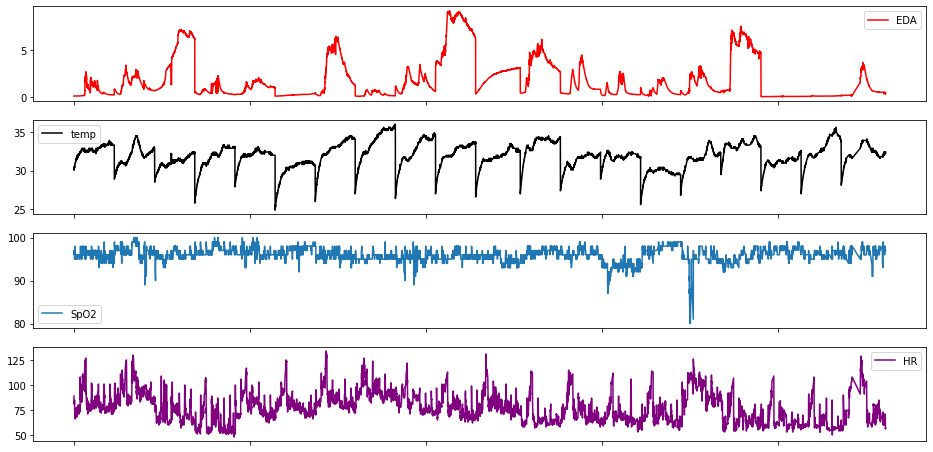

In [7]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(16,8))
all_data.plot(kind='line', y='temp', ax=ax2, color = 'black')
all_data.plot(kind='line', y='EDA', ax=ax1, color='red')
all_data.plot(kind='line', y='SpO2', ax=ax3)
all_data.plot(kind='line', y='HR', ax=ax4, color = 'purple')
ax1.axes.xaxis.set_ticklabels([])
ax2.axes.xaxis.set_ticklabels([])
ax3.axes.xaxis.set_ticklabels([])
ax4.axes.xaxis.set_ticklabels([])

# Training and testing the model

In [8]:
X = all_data.drop(['annotation1'], axis=1)
y = all_data['annotation1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0, shuffle=True)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression

In [9]:
classifierlr = LogisticRegression()
classifierlr.fit(X_train, y_train)
y_pred = classifierlr.predict(X_test)

print("classification report:")
print(classification_report(y_test, y_pred))
print("Cohen Kappa Score:")
print(metrics.cohen_kappa_score(y_test, y_pred))
print()
print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

classification report:
              precision    recall  f1-score   support

           0       0.66      0.70      0.68      6097
           1       0.65      0.61      0.63      5631

    accuracy                           0.66     11728
   macro avg       0.66      0.65      0.65     11728
weighted avg       0.66      0.66      0.66     11728

Cohen Kappa Score:
0.30952805025649976

confusion matrix:
[[4273 1824]
 [2208 3423]]


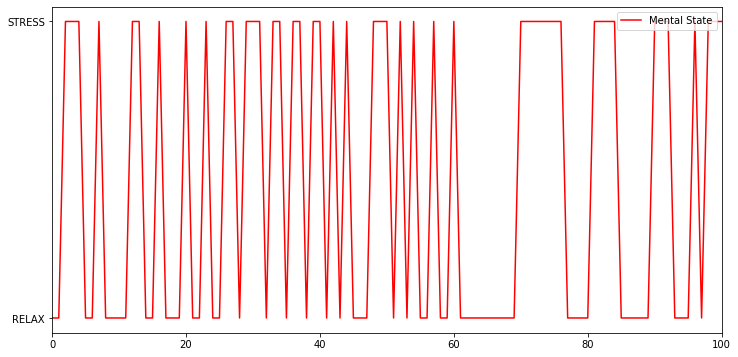

In [10]:
y_predlr = pd.DataFrame(y_pred)
y_predlr = y_predlr.apply(pd.to_numeric)
y_predlr.columns = ['Mental State']

fig, ax = plt.subplots(figsize=(12,6))
y_predlr.plot(color='r', ax=ax)
plt.yticks([0.0,1.0], ['RELAX', 'STRESS'])
plt.xlim([0, 100])
plt.legend(loc='upper right')

# Decision Tree

In [11]:
classifierdt = DecisionTreeClassifier(random_state = 0, max_depth=10)
classifierdt.fit(X_train, y_train)
y_pred = classifierdt.predict(X_test)

print("classification report:")
print(classification_report(y_test, y_pred))
print("Cohen Kappa Score:")
print(metrics.cohen_kappa_score(y_test, y_pred))
print()
print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))
print()
print("Feature importance:")
print(pd.Series(classifierdt.feature_importances_))

classification report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      6097
           1       0.89      0.77      0.83      5631

    accuracy                           0.85     11728
   macro avg       0.85      0.84      0.84     11728
weighted avg       0.85      0.85      0.84     11728

Cohen Kappa Score:
0.6882201986655597

confusion matrix:
[[5568  529]
 [1287 4344]]

Feature importance:
0    0.336491
1    0.264569
2    0.179606
3    0.219333
dtype: float64


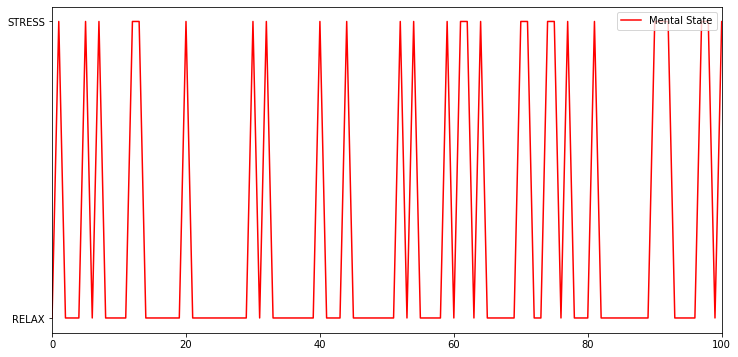

In [12]:
y_preddt = pd.DataFrame(y_pred)
y_preddt = y_preddt.apply(pd.to_numeric)
y_preddt.columns = ['Mental State']

fig, ax = plt.subplots(figsize=(12,6))
y_preddt.plot(color='r', ax=ax)
plt.yticks([0.0,1.0], ['RELAX', 'STRESS'])
plt.xlim([0, 100])
plt.legend(loc='upper right')

# Random Forest

In [13]:
classifierrf = RandomForestClassifier(n_estimators=100, max_depth=10)
classifierrf.fit(X_train,y_train)

y_pred = classifierrf.predict(X_test)

print("classification report:")
print(classification_report(y_test, y_pred))
print("Cohen Kappa Score:")
print(metrics.cohen_kappa_score(y_test, y_pred))
print()
print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))
print()
print("Feature importance:")
print(pd.Series(classifierrf.feature_importances_))

classification report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      6097
           1       0.93      0.91      0.92      5631

    accuracy                           0.92     11728
   macro avg       0.92      0.92      0.92     11728
weighted avg       0.92      0.92      0.92     11728

Cohen Kappa Score:
0.843783329995567

confusion matrix:
[[5689  408]
 [ 506 5125]]

Feature importance:
0    0.329229
1    0.257472
2    0.162298
3    0.251002
dtype: float64


In [14]:
#y_pred = pd.to_numeric(y_pred)
#y_pred

#for i in y_pred:
    #if i == 1:
        #print ('STRESS')
    #else:
        #print ('RELAX')

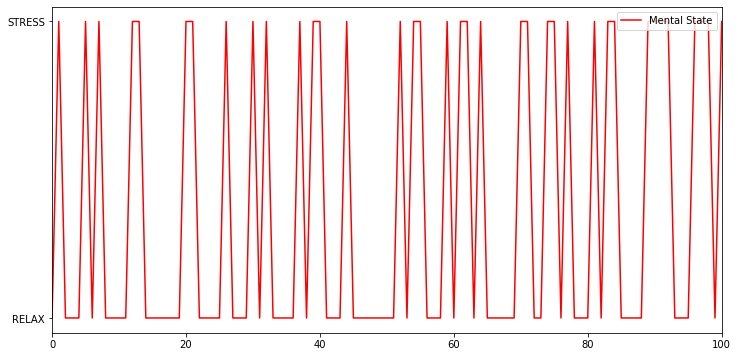

In [15]:
y_predrf = pd.DataFrame(y_pred)
y_predrf = y_predrf.apply(pd.to_numeric)
y_predrf.columns = ['Mental State']

fig, ax = plt.subplots(figsize=(12,6))
y_predrf.plot(color='r', ax=ax)
plt.yticks([0.0,1.0], ['RELAX', 'STRESS'])
plt.xlim([0, 100])
plt.legend(loc='upper right')

# K-Nearest Neighbour

In [16]:
classifierknn = KNeighborsClassifier(n_neighbors = 80)
classifierknn.fit(X_train, y_train) 
y_pred = classifierknn.predict(X_test)

print("classification report:")
print(classification_report(y_test, y_pred))
print("Cohen Kappa Score:")
print(metrics.cohen_kappa_score(y_test, y_pred))
print()
print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

classification report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      6097
           1       0.84      0.84      0.84      5631

    accuracy                           0.85     11728
   macro avg       0.84      0.84      0.84     11728
weighted avg       0.85      0.85      0.85     11728

Cohen Kappa Score:
0.6897396056579511

confusion matrix:
[[5168  929]
 [ 888 4743]]


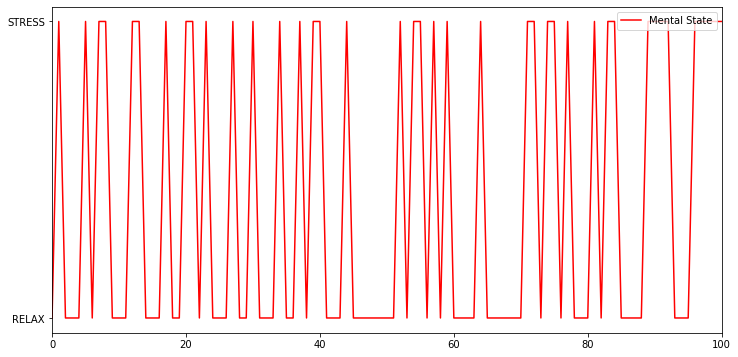

In [17]:
y_predknn = pd.DataFrame(y_pred)
y_predknn = y_predknn.apply(pd.to_numeric)
y_predknn.columns = ['Mental State']

fig, ax = plt.subplots(figsize=(12,6))
y_predknn.plot(color='r', ax=ax)
plt.yticks([0.0,1.0], ['RELAX', 'STRESS'])
plt.xlim([0, 100])
plt.legend(loc='upper right')

# Naive Bayes

In [18]:
classifiernb = GaussianNB()
classifiernb.fit(X_train, y_train)
y_pred  =  classifiernb.predict(X_test)

print("classification report:")
print(classification_report(y_test, y_pred))
print("Cohen Kappa Score:")
print(metrics.cohen_kappa_score(y_test, y_pred))
print()
print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

classification report:
              precision    recall  f1-score   support

           0       0.64      0.73      0.69      6097
           1       0.66      0.56      0.61      5631

    accuracy                           0.65     11728
   macro avg       0.65      0.65      0.65     11728
weighted avg       0.65      0.65      0.65     11728

Cohen Kappa Score:
0.2957747922794276

confusion matrix:
[[4459 1638]
 [2462 3169]]


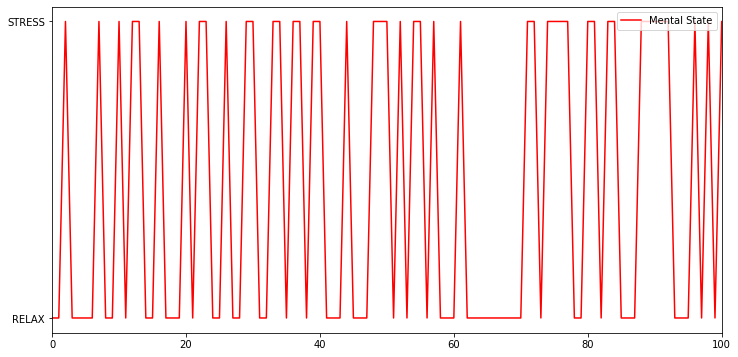

In [19]:
y_prednb = pd.DataFrame(y_pred)
y_prednb = y_prednb.apply(pd.to_numeric)
y_prednb.columns = ['Mental State']

fig, ax = plt.subplots(figsize=(12,6))
y_prednb.plot(color='r', ax=ax)
plt.yticks([0.0,1.0], ['RELAX', 'STRESS'])
plt.xlim([0, 100])
plt.legend(loc='upper right')

# Store and visualize the model

In [20]:
joblib.dump(classifierrf, 'MyBestClassifierrf')

['MyBestClassifierrf']

In [21]:
classifierrf = joblib.load('MyBestClassifierrf')
classifierrf.predict([[30, 0.1, 96, 89]])

array(['1'], dtype=object)